In [64]:
# IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# regex libraries
import re

# string libraries
import string

# nltk libraries
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')


from wordcloud import WordCloud, STOPWORDS


#sklearn libraries
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import train_test_split

# tensorflow libraries
from keras.layers import Embedding

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
train_df = pd.read_csv('/content/drive/My Drive/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/test.csv')

In [4]:
# Exploratory Data Analysis
print(train_df.shape)

(1306122, 3)


In [5]:
print(test_df.shape)

(375806, 2)


In [6]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [8]:
# checking the information for the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [9]:
# checking the information for the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [10]:
# checking for the null values in the dataset
train_df.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [11]:
test_df.isnull().sum()


qid              0
question_text    0
dtype: int64

In [12]:
# In the previous code where the base line model was created all the eda and feature extraction was done so in this code where
# another model is applied that steps won't be performed. we will start directly with the data cleaning process. 
# Data Pre-processing 
# Removing Numbers
# Removing HTML Tags
# Cleaning contractions.
# Spell Correction.
# Removing punctuations.
# Removing Stopwords.
# Using WordNet Lemmatizer

In [13]:
# Replacing numbers and html tags from the text
from bs4 import BeautifulSoup
def remove_html_tags(data):
  return BeautifulSoup(data, 'html.parser').get_text()

# creating a function to remove special characters or numbers from the text
def remove_special_char(data):
  pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
  return re.sub(pat, '', data)



In [14]:
# Punctuation removal
def punct_removal(data):
  data = ''.join([item for item in data if item not in string.punctuation])
  return data
# the above method will remove this punctuation from the code !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
# Correcting the mispellings in the sentences
mispellings = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'bitcoin', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization', 
                'electroneum':'bitcoin','nanodegree':'degree','hotstar':'star','dream11':'dream','ftre':'fire','tensorflow':'framework','unocoin':'bitcoin',
                'lnmiit':'limit','unacademy':'academy','altcoin':'bitcoin','altcoins':'bitcoin','litecoin':'bitcoin','coinbase':'bitcoin','cryptocurency':'cryptocurrency',
                'simpliv':'simple','quoras':'quora','schizoids':'psychopath','remainers':'remainder','twinflame':'soulmate','quorans':'quora','brexit':'demonetized',
                'iiest':'institute','dceu':'comics','pessat':'exam','uceed':'college','bhakts':'devotee','boruto':'anime',
                'cryptocoin':'bitcoin','blockchains':'blockchain','fiancee':'fiance','redmi':'smartphone','oneplus':'smartphone','qoura':'quora','deepmind':'framework','ryzen':'cpu','whattsapp':'whatsapp',
                'undertale':'adventure','zenfone':'smartphone','cryptocurencies':'cryptocurrencies','koinex':'bitcoin','zebpay':'bitcoin','binance':'bitcoin','whtsapp':'whatsapp',
                'reactjs':'framework','bittrex':'bitcoin','bitconnect':'bitcoin','bitfinex':'bitcoin','yourquote':'your quote','whyis':'why is','jiophone':'smartphone',
                'dogecoin':'bitcoin','onecoin':'bitcoin','poloniex':'bitcoin','7700k':'cpu','angular2':'framework','segwit2x':'bitcoin','hashflare':'bitcoin','940mx':'gpu',
                'openai':'framework','hashflare':'bitcoin','1050ti':'gpu','nearbuy':'near buy','freebitco':'bitcoin','antminer':'bitcoin','filecoin':'bitcoin','whatapp':'whatsapp',
                'empowr':'empower','1080ti':'gpu','crytocurrency':'cryptocurrency','8700k':'cpu','whatsaap':'whatsapp','g4560':'cpu','payymoney':'pay money',
                'fuckboys':'fuck boys','intenship':'internship','zcash':'bitcoin','demonatisation':'demonetization','narcicist':'narcissist','mastuburation':'masturbation',
                'trignometric':'trigonometric','cryptocurreny':'cryptocurrency','howdid':'how did','crytocurrencies':'cryptocurrencies','phycopath':'psychopath',
                'bytecoin':'bitcoin','possesiveness':'possessiveness','scollege':'college','humanties':'humanities','altacoin':'bitcoin','demonitised':'demonetized',
                'brasília':'brazilia','accolite':'accolyte','econimics':'economics','varrier':'warrier','quroa':'quora','statergy':'strategy','langague':'language',
                'splatoon':'game','7600k':'cpu','gate2018':'gate 2018','in2018':'in 2018','narcassist':'narcissist','jiocoin':'bitcoin','hnlu':'hulu','7300hq':'cpu',
                'weatern':'western','interledger':'blockchain','deplation':'deflation', 'cryptocurrencies':'cryptocurrency', 'bitcoin':'blockchain cryptocurrency',}

def correct_words(data):
  words = data.split()
  for i in range(0,len(words)):
    if mispellings.get(words[i]) is not None:
      words[i] = mispellings.get(words[i])
    elif mispellings.get(words[i].lower()) is not None:
      words[i] = mispellings.get(words[i].lower())

  words = " ".join(words)
  return words

In [16]:
# Stopwords Removal
def stopword_removal(data):
  data = [word for word in data.split() if word not in STOPWORDS]
  data = ' '.join(data)
  return data

In [17]:
# Contractions are nothing but shortened versions of words or syllables
# there are functions for contraction removal 
# but we will be using our custom made dictionary which contains list of contraction 
contractions = {"We'd": "We had", "That'd": "That had", "AREN'T": "Are not", "HADN'T": "Had not", "Could've": "Could have", 
                       "LeT's": "Let us", "How'll": "How will", "They'll": "They will", "DOESN'T": "Does not", "HE'S": "He has", 
                       "O'Clock": "Of the clock", "Who'll": "Who will", "What'S": "What is", "Ain't": "Am not", "WEREN'T": "Were not", 
                       "Y'all": "You all", "Y'ALL": "You all", "Here's": "Here is", "It'd": "It had", "Should've": "Should have", 
                       "I'M": "I am", "ISN'T": "Is not", "Would've": "Would have", "He'll": "He will", "DON'T": "Do not", "She'd": "She had",
                       "WOULDN'T": "Would not", "She'll": "She will", "IT's": "It is", "There'd": "There had", "It'll": "It will", 
                       "You'll": "You will", "He'd": "He had", "What'll": "What will", "Ma'am": "Madam", "CAN'T": "Can not",
                       "THAT'S": "That is", "You've": "You have", "She's": "She is", "Weren't": "Were not", "They've": "They have", 
                       "Couldn't": "Could not", "When's": "When is", "Haven't": "Have not", "We'll": "We will", "That's": "That is",
                       "We're": "We are", "They're": "They' are", "You'd": "You would", "How'd": "How did", "What're": "What are", 
                       "Hasn't": "Has not", "Wasn't": "Was not", "Won't": "Will not", "There's": "There is", "Didn't": "Did not", 
                       "Doesn't": "Does not", "You're": "You are", "He's": "He is", "SO's": "So is", "We've": "We have", "Who's": "Who is", 
                       "Wouldn't": "Would not", "Why's": "Why is", "WHO's": "Who is", "Let's": "Let us", "How's": "How is", 
                       "Can't": "Can not", "Where's": "Where is", "They'd": "They had", "Don't": "Do not", "Shouldn't":"Should not", 
                       "Aren't":"Are not", "ain't": "is not", "What's": "What is", "It's": "It is", "Isn't":"Is not", "aren't": "are not",
                       "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", 
                       "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                       "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
                       "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                       "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                       "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
                       "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                       "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", 
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                       "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                       "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" }

def clean_contractions(text):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    
    text = ' '.join([contractions[t] if t in contractions else t for t in text.split(" ")])
    return text

In [18]:
#Converting the text into lower case
def text_lower(data):
  return data.lower()

In [19]:
#Lemmatization : it is used to generate the root of the word
lemmatizer = WordNetLemmatizer()
def lemma(data):
  data = data.split()
  data = [lemmatizer.lemmatize(word) for word in data]
  data = ' '.join(data)
  return data

In [20]:
def text_cleaning(data):
  data = remove_html_tags(data)
  data = remove_special_char(data)
  data = punct_removal(data)
  data = correct_words(data)
  data = stopword_removal(data)
  data = clean_contractions(data)
  data = text_lower(data)
  data = lemma(data)
  return data

In [21]:
# preprocessing train and test data
%%time
train_df['clean_train_text'] = train_df['question_text'].apply(lambda data: text_cleaning(data))
test_df['clean_test_text'] = test_df['question_text'].apply(lambda data: text_cleaning(data))

CPU times: user 3min 1s, sys: 15.4 s, total: 3min 16s
Wall time: 3min 16s


In [22]:
train_df.head()

,qid,question_text,target,clean_train_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,how quebec nationalist see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,do adopted dog encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,why velocity affect time doe velocity affect s...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,how otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,can i convert montra helicon d mountain bike c...


In [23]:
test_df.head()

,qid,question_text,clean_test_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,why many woman become rude arrogant little bit...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,when i apply rv college engineering bm college...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,what really nurse practitioner
3,000086e4b7e1c7146103,Who are entrepreneurs?,who entrepreneur
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,is education really making good people nowadays


In [27]:
# Zipping GloVe Embedding for the word embedding as a model
!wget 'http://nlp.stanford.edu/data/glove.840B.300d.zip'
!unzip '/content/glove.840B.300d.zip'

--2020-12-07 15:48:17--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-12-07 15:48:17--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-12-07 15:48:17--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [24]:
# Splitting the training data set into Train and Test Set for evaluating the performance of the model.
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_df,test_size = 0.2, random_state = 42 )

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

top_words = 6000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(list(train['clean_train_text'])+list(test['clean_train_text']))
tokenized_train = tokenizer.texts_to_sequences(train['clean_train_text'])

word_index = tokenizer.word_index
# tokenized_train_test = tokenizer.texts_to_sequences(test['clean_train_text']) # X_test

# tokenized_test = tokenizer.texts_to_sequences(test_df['clean_test_text'])


#padding converts the integer array of variable length into fixed length either by truncating the maxlength or padding
max_text_length = 130
X_train = pad_sequences(tokenized_train, maxlen=max_text_length) #tokenized_train = X_train
y_train = train['target'] # train['target'] = y_train


# test_text = pad_sequences(tokenized_test,maxlen = max_text_length)

In [37]:
type(word_index)

dict

Glove Stands for Global Vectors

In [28]:
# # preparing the embedding layer by applying Glove Embedding
embeddings_index_glove= {}

f = open('/content/glove.840B.300d.txt',encoding='utf-8')
for line in f:
  values = line.rsplit(' ')
  word = values[0]
  coeff = np.asarray(values[1:],dtype='float32')
  embeddings_index_glove[word] = coeff
f.close()

print('Found %s word vectors.' %len(embeddings_index_glove))

# embedding_file = '/content/glove.840B.300d.txt'

Found 2196016 word vectors.


In [29]:
# we can use embedding index and word index to create a embedding matrix
embedding_dim_glove = 300
embedding_matrix_glove = np.zeros((len(word_index) + 1, embedding_dim_glove))
for word , i in word_index.items():
  embedding_vector_glove = embeddings_index_glove.get(word)
  if embedding_vector_glove is not None:     # words not found in embedding index will be all-zeros.
    embedding_matrix_glove[i] = embedding_vector_glove
    

In [30]:
# We load this embedding matrix into an Embedding layer. 
# we set trainable=False to prevent the weights from being updated during training. 
# Previously we used the default Embedding layer, withtrainable=True ,
# which learned the Embeddings through the training process.

glove_emb_layer = Embedding(len(word_index)+1,
                            embedding_dim_glove,
                            weights= [embedding_matrix_glove],
                            input_length = max_text_length,
                            trainable = False)

In [42]:
# Applying a RNN-LSTM Model. we will be stacking two Bidirectional LSTM Layers
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
import tensorflow as tf
from keras.layers import Bidirectional, SpatialDropout1D
# Generally, we use softmax activation instead of sigmoid with the cross-entropy loss 
# because softmax activation distributes the probability throughout each output node.
# But, since it is a binary classification, using sigmoid is same as softmax. 


In [61]:
quora_model_with_glove = Sequential()
quora_model_with_glove.add(glove_emb_layer)
quora_model_with_glove.add(Bidirectional(LSTM(64,return_sequences=True)))
quora_model_with_glove.add(Bidirectional(LSTM(32)))
quora_model_with_glove.add(Dense(64, activation='relu'))
quora_model_with_glove.add(Dropout(0.5))
quora_model_with_glove.add(Dense(1, activation='sigmoid'))

quora_model_with_glove.compile(loss='binary_crossentropy',optimizer ='adam',metrics =['accuracy'])

print(quora_model_with_glove.summary())


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 300)          69792300  
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 130, 128)          186880    
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 70,024,621
Trainable params: 232,321
Non-trainable params: 69,792,300
___________________________________

In [62]:
model_with_glove_emd = quora_model_with_glove.fit(X_train,y_train,epochs=10, batch_size=256,validation_split=0.2)

Epoch 1/10
3266/3266 [==============================] - 170s 52ms/step - loss: 0.1300 - accuracy: 0.9511 - val_loss: 0.1203 - val_accuracy: 0.9523
Epoch 2/10
3266/3266 [==============================] - 168s 51ms/step - loss: 0.1164 - accuracy: 0.9554 - val_loss: 0.1163 - val_accuracy: 0.9550
Epoch 3/10
3266/3266 [==============================] - 167s 51ms/step - loss: 0.1108 - accuracy: 0.9571 - val_loss: 0.1154 - val_accuracy: 0.9555
Epoch 4/10
3266/3266 [==============================] - 167s 51ms/step - loss: 0.1056 - accuracy: 0.9586 - val_loss: 0.1150 - val_accuracy: 0.9556
Epoch 5/10
3266/3266 [==============================] - 167s 51ms/step - loss: 0.1006 - accuracy: 0.9604 - val_loss: 0.1158 - val_accuracy: 0.9555
Epoch 6/10
3266/3266 [==============================] - 168s 51ms/step - loss: 0.0952 - accuracy: 0.9619 - val_loss: 0.1218 - val_accuracy: 0.9527
Epoch 7/10
3266/3266 [==============================] - 170s 52ms/step - loss: 0.0898 - accuracy: 0.9639 - val_loss: 0

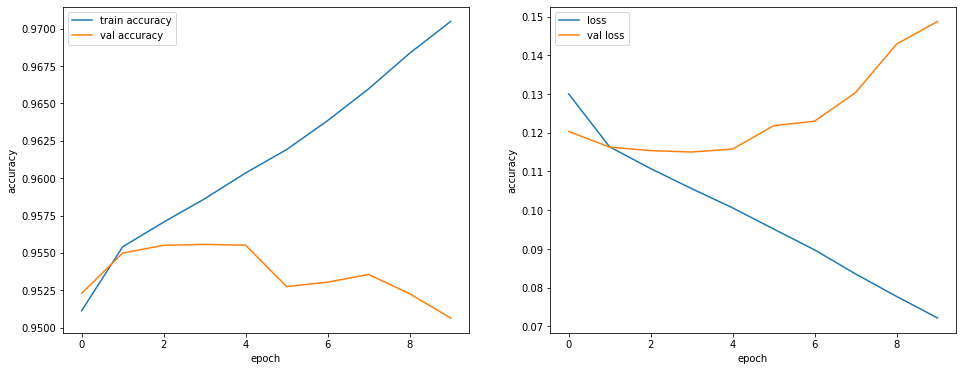

In [67]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(model_with_glove_emd.history['accuracy'], label='train accuracy')
plt.plot(model_with_glove_emd.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

plt.subplot(1,2,2)
plt.plot(model_with_glove_emd.history['loss'], label='loss')
plt.plot(model_with_glove_emd.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

plt.show()

In [68]:
# predicting train_test result
%%time
tokenized_train_test = tokenizer.texts_to_sequences(test['clean_train_text']) # X_test
X_test = pad_sequences(tokenized_train_test, maxlen=max_text_length)
y_test = test['target']
prediction_train_test = quora_model_with_glove.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
CPU times: user 1min 39s, sys: 5.94 s, total: 1min 45s
Wall time: 1min 31s


In [69]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy of the model : ", accuracy_score(prediction_train_test, y_test))
print('F1-score: ', f1_score(prediction_train_test, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,prediction_train_test)

Accuracy of the model :  0.9529332950521581
F1-score:  0.5944252020451922
Confusion matrix:


array([[239920,   5449],
       [  6846,   9010]])

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_train_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    245369
           1       0.62      0.57      0.59     15856

    accuracy                           0.95    261225
   macro avg       0.80      0.77      0.78    261225
weighted avg       0.95      0.95      0.95    261225



In [73]:
%%time
tokenized_test = tokenizer.texts_to_sequences(test_df['clean_test_text'])
test_text = pad_sequences(tokenized_test,maxlen = max_text_length)
prediction_test_set = quora_model_with_glove.predict_classes(test_text)

CPU times: user 2min 18s, sys: 8.44 s, total: 2min 27s
Wall time: 2min 7s


In [74]:
prediction_test_set

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [75]:
# Generating a csv file from the prediction data which will be then compared with the original submission file which 
prediction_test = prediction_test_set.reshape((-1,1))
submission = test_df[['qid']].copy()
submission['prediction'] = prediction_test
submission.to_csv('submission_rnn_lstm.csv',index = False)